In [1]:
import glob 

import pickle as pkl 
from scipy import io as sio

%matplotlib inline 
import matplotlib.pyplot as plt

from scipy.signal import lfilter

In [12]:
raws = glob.glob('../../../results/Data_23042020_noisy/0to50speed_0torque_0/*')

In [13]:
print (raws[0])
data = sio.loadmat(raws[0])

../../../results/Data_23042020_noisy/0to50speed_0torque_0/deep_fnn_act_relu_stride_1_window_50_inpQuants_noisy_voltage_d,noisy_voltage_q,noisy_current_d,noisy_current_q_outQuants_speed_lr_0.1_batchSize_10000_epochs_500_loss_mse.mat


In [14]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pred_speed', 'pred_torque', 'speed_ml_metrics', 'torque_ml_metrics', 'speed_metrics', 'torque_metrics', 'model_speed_metrics', 'model_torque_metrics', 'voltage_d', 'voltage_q', 'current_d', 'current_q', 'torque', 'speed', 'statorPuls', 'time', 'reference_torque_interp', 'reference_speed_interp', 'reference_torque', 'reference_speed', 'torque_time', 'speed_time', 'noisy_current_d', 'noisy_current_q', 'noisy_voltage_d', 'noisy_voltage_q'])

Text(0, 0.5, 'Current (A)')

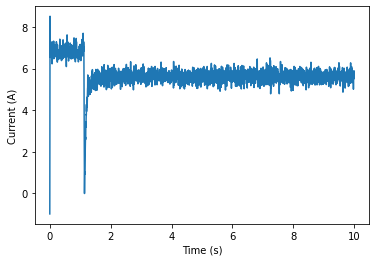

In [16]:
plt.plot(data['time'][0], data['noisy_current_d'][0])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')

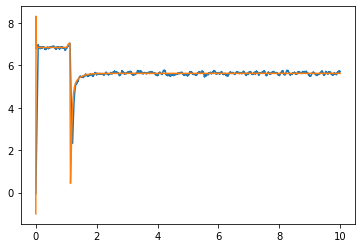

In [22]:
n = 20
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,data['noisy_current_d'][0])

plt.plot(data['time'][0], yy)
plt.plot(data['time'][0], data['current_d'][0])